In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


In [3]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66b78d09f028691491a95b1c9cabcbfd'

In [4]:
city_url = url + "&q=" + city
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66b78d09f028691491a95b1c9cabcbfd&q=muskegon'

In [5]:



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]       
            
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        #pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constitucion
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | clyde river
Processing Record 4 of Set 1 | cochrane
Processing Record 5 of Set 1 | strezhevoy
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | smithers
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | gao
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | shahe
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | praia da vitoria
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | hervey bay
Processing Record 21 of Set 1 | meulaboh
Processing Record 22 of Set 1 | thompson
Proces

Processing Record 32 of Set 4 | hasaki
Processing Record 33 of Set 4 | tukrah
Processing Record 34 of Set 4 | rio gallegos
Processing Record 35 of Set 4 | husavik
Processing Record 36 of Set 4 | baracoa
Processing Record 37 of Set 4 | viedma
Processing Record 38 of Set 4 | castro
Processing Record 39 of Set 4 | poli
Processing Record 40 of Set 4 | doha
Processing Record 41 of Set 4 | lubumbashi
Processing Record 42 of Set 4 | kapaa
Processing Record 43 of Set 4 | ancud
Processing Record 44 of Set 4 | butembo
Processing Record 45 of Set 4 | qaanaaq
Processing Record 46 of Set 4 | saskylakh
Processing Record 47 of Set 4 | oranjemund
Processing Record 48 of Set 4 | teya
Processing Record 49 of Set 4 | mudyuga
City not found. Skipping...
Processing Record 0 of Set 5 | port blair
Processing Record 1 of Set 5 | mahebourg
Processing Record 2 of Set 5 | kaka
Processing Record 3 of Set 5 | mezhgorye
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | kaitangata
Processing Recor

Processing Record 25 of Set 8 | sorvag
City not found. Skipping...
Processing Record 26 of Set 8 | xiongzhou
Processing Record 27 of Set 8 | san vicente
Processing Record 28 of Set 8 | luena
Processing Record 29 of Set 8 | bandarbeyla
Processing Record 30 of Set 8 | saldanha
Processing Record 31 of Set 8 | loei
Processing Record 32 of Set 8 | tuchkovo
Processing Record 33 of Set 8 | camacha
Processing Record 34 of Set 8 | cabo rojo
Processing Record 35 of Set 8 | wellington
Processing Record 36 of Set 8 | kailua
Processing Record 37 of Set 8 | phetchabun
Processing Record 38 of Set 8 | yirol
City not found. Skipping...
Processing Record 39 of Set 8 | lensk
Processing Record 40 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 8 | provideniya
Processing Record 42 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 43 of Set 8 | tutoia
Processing Record 44 of Set 8 | shimoda
Processing Record 45 of Set 8 | moron
Processing Record 46 of Set 8 | 

Processing Record 12 of Set 12 | vilhena
Processing Record 13 of Set 12 | berdyuzhye
City not found. Skipping...
Processing Record 14 of Set 12 | kabare
Processing Record 15 of Set 12 | cherskiy
Processing Record 16 of Set 12 | california city
Processing Record 17 of Set 12 | bannu
Processing Record 18 of Set 12 | lavrentiya
Processing Record 19 of Set 12 | ewa beach
Processing Record 20 of Set 12 | hofn
Processing Record 21 of Set 12 | wajir
Processing Record 22 of Set 12 | afsin
Processing Record 23 of Set 12 | wairoa
Processing Record 24 of Set 12 | arinos
Processing Record 25 of Set 12 | narkevychi
Processing Record 26 of Set 12 | wisconsin rapids
Processing Record 27 of Set 12 | xining
Processing Record 28 of Set 12 | biltine
Processing Record 29 of Set 12 | ixtapa
Processing Record 30 of Set 12 | garowe
Processing Record 31 of Set 12 | hay river
Processing Record 32 of Set 12 | hualmay
Processing Record 33 of Set 12 | shibetsu
Processing Record 34 of Set 12 | sioux lookout
Proces

In [6]:
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constitucion,-35.3333,-72.4167,67.93,54,78,14.81,CL,1675191063
1,bathsheba,13.2167,-59.5167,83.01,61,40,17.27,BB,1675191163
2,clyde river,70.4692,-68.5914,-14.57,76,100,8.05,CA,1675191163
3,cochrane,51.1834,-114.4687,20.62,84,100,4.34,CA,1675191164
4,strezhevoy,60.7333,77.5889,-4.32,100,68,5.01,RU,1675191164


In [8]:


# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")



In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klaksvik,62.2266,-6.5890,40.12,73,73,24.90,FO,1675131456
1,marfino,55.7028,37.3822,28.65,86,100,15.66,RU,1675131590
2,albany,42.6001,-73.9662,30.63,86,100,1.99,US,1675131190
3,kapaa,22.0752,-159.3190,71.92,94,100,24.16,US,1675131350
4,hobart,-42.8794,147.3294,71.46,56,40,12.66,AU,1675131224


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [12]:
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

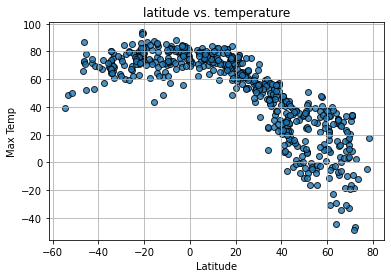

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lat, max_temp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City" )
# Incorporate the other graph properties
plt.title(f"latitude vs. temperature")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

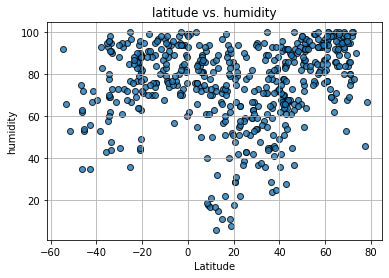

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City" )

# Incorporate the other graph properties
plt.title(f"latitude vs. humidity")
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

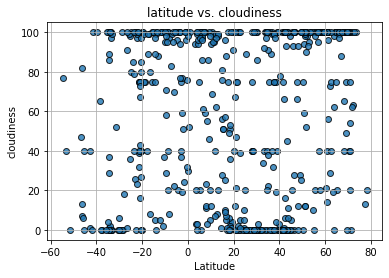

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City" )

# Incorporate the other graph properties
plt.title(f"latitude vs. cloudiness")
plt.ylabel("cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

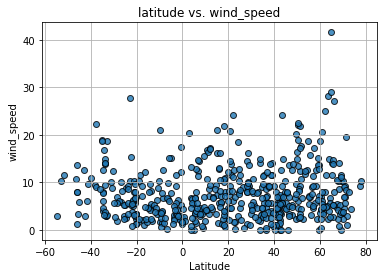

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City" )

# Incorporate the other graph properties
plt.title(f"latitude vs. wind_speed")
plt.ylabel("wind_speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values=x_values*slope+ intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-squared is: {r_value**2}")
   

In [82]:
city_data_df["Lat"] >=0

City_ID
0       True
1       True
2       True
3       True
4      False
       ...  
533     True
534    False
535     True
536     True
537    False
Name: Lat, Length: 538, dtype: bool

In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klaksvik,62.2266,-6.5890,40.12,73,73,24.90,FO,1675131456
1,marfino,55.7028,37.3822,28.65,86,100,15.66,RU,1675131590
2,albany,42.6001,-73.9662,30.63,86,100,1.99,US,1675131190
3,kapaa,22.0752,-159.3190,71.92,94,100,24.16,US,1675131350
5,port hardy,50.6996,-127.4199,35.78,75,100,4.61,CA,1675131475


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] <0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,hobart,-42.8794,147.3294,71.46,56,40,12.66,AU,1675131224
6,mahebourg,-20.4081,57.7000,77.25,88,40,3.44,MU,1675131592
11,bluff,-46.6000,168.3333,65.64,75,47,10.69,NZ,1675131459
14,ushuaia,-54.8000,-68.3000,39.06,92,77,3.00,AR,1675131097
16,lorengau,-2.0226,147.2712,83.62,73,51,6.26,PG,1675131350


###  Temperature vs. Latitude Linear Regression Plot

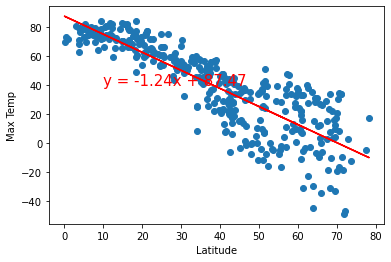

The r-squared is: 0.7242071700513522


In [85]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,
                      y_values,
                      "Temperature vs. Latitude Linear Regression Plot", "Max Temp",
                      (10,40))


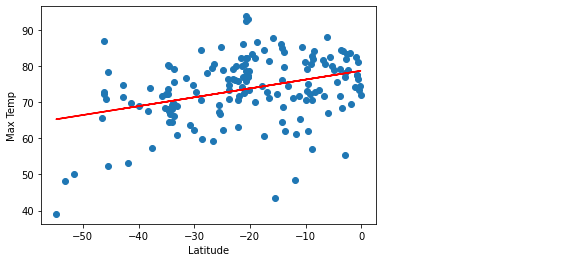

The r-squared is: 0.12393397413911818


In [86]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,
                      y_values,
                      "Temperature vs. Latitude Linear Regression Plot", "Max Temp",
                      (10,40))


**Discussion about the linear relationship:** The temperature in the northern and the southern hemisphere sort of mirror each other in that the further away you get from the equator the colder it gets. 

### Humidity vs. Latitude Linear Regression Plot

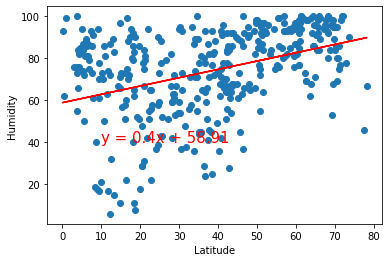

The r-squared is: 0.1508837652854825


In [56]:
# Northern Hemisphere

x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
plot_linear_regression(x_values,
                      y_values,
                      "Humidity vs. Latitude Linear Regression Plot", "Humidity",
                      (10,40))

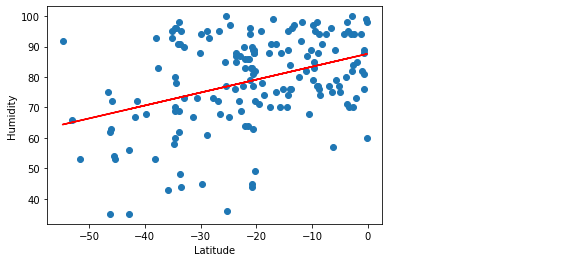

The r-squared is: 0.14097174779005384


In [60]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
plot_linear_regression(x_values,
                      y_values,
                      "Humidity vs. Latitude Linear Regression Plot", "Humidity",
                      (10,40))

**Discussion about the linear relationship:** As we go from the souther hemisphere to the northern the humidity has a similar R squared value and act as a continuous line throughout the hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

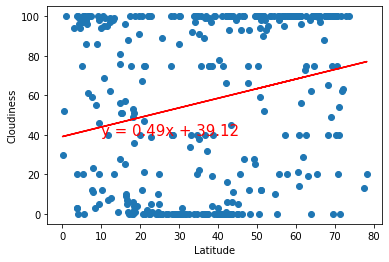

The r-squared is: 0.05414786546458813


In [58]:
# Northern Hemisphere

x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,
                      y_values,
                      "Cloudiness vs. Latitude Linear Regression Plot", "Cloudiness",
                      (10,40))

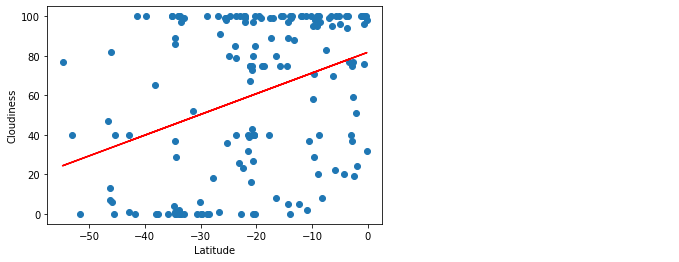

The r-squared is: 0.12510011916825262


In [61]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,
                      y_values,
                      "Cloudiness vs. Latitude Linear Regression Plot", "Cloudiness",
                      (30,50))

**Discussion about the linear relationship:** for the northern hemisphere, as we move away from the equator the sky statistically becomes more cloudy. The opposite can be said for the sourthern hemispere. as we move away from the equator we find the sky to be less cloudy. 

### Wind Speed vs. Latitude Linear Regression Plot

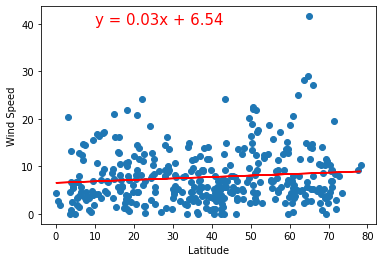

The r-squared is: 0.01183302501822378


In [62]:
# Northern Hemisphere

x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,
                      y_values,
                      "Wind Speed vs. Latitude Linear Regression Plot", "Wind Speed",
                      (10,40))

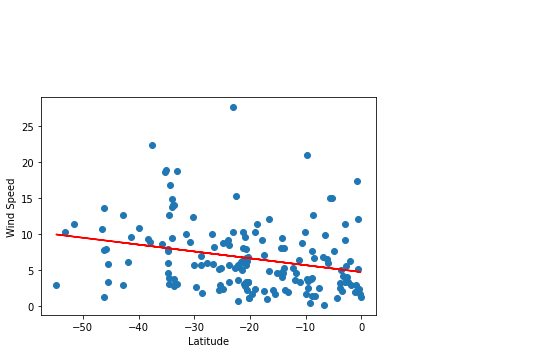

The r-squared is: 0.0692091482031882


In [63]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,
                      y_values,
                      "Wind Speed vs. Latitude Linear Regression Plot", "Wind Speed",
                      (10,40))

In [ ]:
**Discussion about the linear relationship:** In both hemespheres, as we move away from the equator, we find that wind speeds slightly increase.